In [20]:
import pandas as pd
import numpy as np
import random 

import statsmodels.formula.api as sm
import sys
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

sys.version

'3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [21]:
!pip show statsmodels

Name: statsmodels
Version: 0.8.0
Summary: Statistical computations and models for Python
Home-page: http://www.statsmodels.org/
Author: Skipper Seabold, Josef Perktold
Author-email: pystatsmodels@googlegroups.com
License: BSD License
Location: /anaconda3/lib/python3.6/site-packages
Requires: 
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
### read in raw data

d = pd.read_csv('../data/raw_data.csv')
d = d.dropna(how='any')
d.head()

,Date,Location,Treatment,as_measured,amount_used,collector,google_second_wave_trend,google_drug_resistant_trend,is_suspicious
0,3/10/18,eca- front desk,0.0,1594,0.0,Nikki,0.0,0.0,0.0
1,3/11/18,eca- front desk,0.0,1583,11.0,Nikki,0.0,0.0,0.0
2,3/12/18,eca- front desk,0.0,1573,10.0,Nikki,0.0,0.0,0.0
3,3/13/18,eca- front desk,0.0,1566,7.0,Nikki,0.0,48.0,0.0
4,3/14/18,eca- front desk,0.0,1549,17.0,Nikki,0.0,0.0,0.0


In [23]:
d.shape

(212, 9)

In [24]:
### get summary stats for treatment useage
d[d['Treatment'] == 1]['amount_used'].describe()

count     77.000000
mean      12.051948
std       31.195013
min       -4.000000
25%        3.000000
50%        7.000000
75%       12.000000
max      273.000000
Name: amount_used, dtype: float64

In [25]:
### get summary stats for treament useage
d[d['Treatment'] == 0]['amount_used'].describe()

count    135.000000
mean       7.629630
std       26.690806
min     -158.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      203.000000
Name: amount_used, dtype: float64

In [26]:
### find difference in means for ctrl/treatment
diff_mean = (d[d['Treatment'] == 1]['amount_used'].describe()['mean'] - d[d['Treatment'] == 0]['amount_used'].describe()['mean'])
diff_mean

4.4223184223184226

In [27]:
### create numeric mapping for locations
unique_locs = d.Location.value_counts().index.tolist()
loc_map = [x for x in range(len(unique_locs))]
loc_set = dict(zip(unique_locs, loc_map))
#loc_set

d['numeric_location'] = d['Location'].map(lambda x: loc_set[x] if x in loc_set.keys() else -1)
d.head()
#d['Location'].value_counts().sum()

,Date,Location,Treatment,as_measured,amount_used,collector,google_second_wave_trend,google_drug_resistant_trend,is_suspicious,numeric_location
0,3/10/18,eca- front desk,0.0,1594,0.0,Nikki,0.0,0.0,0.0,0
1,3/11/18,eca- front desk,0.0,1583,11.0,Nikki,0.0,0.0,0.0,0
2,3/12/18,eca- front desk,0.0,1573,10.0,Nikki,0.0,0.0,0.0,0
3,3/13/18,eca- front desk,0.0,1566,7.0,Nikki,0.0,48.0,0.0,0
4,3/14/18,eca- front desk,0.0,1549,17.0,Nikki,0.0,0.0,0.0,0


In [28]:
loc_set

{'Avalon - Gym': 4,
 'Avalon - Lobby': 10,
 'concur - 10th floor': 8,
 'concur - 16th floor': 5,
 'concur - 3rd floor': 2,
 'concur - 5th floor': 9,
 'concur -12th floor': 7,
 'eca- front desk': 0,
 'ped - well': 6,
 'ped- not well': 3,
 'yarn shop': 1}

In [29]:
d.tail()

,Date,Location,Treatment,as_measured,amount_used,collector,google_second_wave_trend,google_drug_resistant_trend,is_suspicious,numeric_location
218,4/9/18,Avalon - Gym,0.0,1756,7.0,Carmen,31.0,31.0,0.0,4
219,4/10/18,Avalon - Gym,0.0,1749,7.0,Carmen,0.0,46.0,0.0,4
220,4/11/18,Avalon - Gym,0.0,1742,7.0,Carmen,15.0,54.0,0.0,4
221,4/12/18,Avalon - Gym,0.0,1740,2.0,Carmen,0.0,47.0,0.0,4
222,4/13/18,Avalon - Gym,0.0,1735,5.0,Carmen,0.0,66.0,0.0,4


In [30]:
d['numeric_location'].value_counts()

0     28
1     26
6     20
5     20
4     20
3     20
2     20
8     19
7     19
9     16
10     4
Name: numeric_location, dtype: int64

In [31]:
### without clustering, without ignoring outlyers, just straight OLS


ols_revised = sm.ols(formula="amount_used ~ Treatment", data=d).fit(
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.189
Date:                Sun, 15 Apr 2018   Prob (F-statistic):              0.277
Time:                        14:42:23   Log-Likelihood:                -1009.3
No. Observations:                 212   AIC:                             2023.
Df Residuals:                     210   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6296      2.445      3.121      0.002       2.838      12.421
Treatment      4.4223      4.056      1.090      0.276      -3.528      12.372
==============================================================================
Omnibus:                      264.110   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23723.717
Skew:                           4.987   Prob(JB):                         0.00
Kurtosis:                      53.855   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
### run a quick linear regression with clustering on location

ols_revised = sm.ols(formula="amount_used ~ Treatment", data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.9422
Date:                Sun, 15 Apr 2018   Prob (F-statistic):              0.355
Time:                        14:42:24   Log-Likelihood:                -1009.3
No. Observations:                 212   AIC:                             2023.
Df Residuals:                     210   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6296      3.016      2.530      0.030       0.909      14.350
Treatment      4.4223      4.556      0.971      0.355      -5.729      14.574
==============================================================================
Omnibus:                      264.110   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23723.717
Skew:                           4.987   Prob(JB):                         0.00
Kurtosis:                      53.855   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [33]:
### We can see from the results that the pvalue for treatment is not below the Z test

In [34]:
### check out when adding in google trends for "flu second wave"
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + Treatment*google_second_wave_trend",
                                                        data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.9098
Date:                Sun, 15 Apr 2018   Prob (F-statistic):              0.470
Time:                        14:42:24   Log-Likelihood:                -1009.1
No. Observations:                 212   AIC:                             2026.
Df Residuals:                     208   BIC:                             2040.
Df Model:                           3                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.8786      2.093      3.287      0.008       2.216      11.541
Treatment                              4.7146      3.009      1.567      0.148      -1.991      11.420
google_second_wave_trend               0.0504      0.132      0.382      0.711      -0.244       0.345
Treatment:google_second_wave_trend    -0.0347      0.156     -0.222      0.829      -0.383       0.314
==============================================================================
Omnibus:                      260.757   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23221.376
Skew:                           4.874   Prob(JB):                         0.00
Kurtosis:                      53.337   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [35]:
### check out when adding in google trends for "drug resistant"
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_drug_resistant_trend + Treatment*google_drug_resistant_trend",
                                                        data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7695
Date:                Sun, 15 Apr 2018   Prob (F-statistic):              0.537
Time:                        14:42:24   Log-Likelihood:                -1008.7
No. Observations:                 212   AIC:                             2025.
Df Residuals:                     208   BIC:                             2039.
Df Model:                           3                                         
Covariance Type:              cluster                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 7.1273      3.431      2.077      0.065      -0.518      14.773
Treatment                                 7.0272      6.478      1.085      0.303      -7.407      21.462
google_drug_resistant_trend               0.0251      0.055      0.454      0.660      -0.098       0.148
Treatment:google_drug_resistant_trend    -0.1205      0.104     -1.156      0.274      -0.353       0.112
==============================================================================
Omnibus:                      262.767   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23209.180
Skew:                           4.949   Prob(JB):                         0.00
Kurtosis:                      53.294   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [36]:
###next steps:
### add in dummies for location and then add them into the OLS formula
dum = pd.get_dummies(d['Location'])
d = pd.concat([d, dum], axis = 1)
d.head()

,Date,Location,Treatment,as_measured,amount_used,collector,google_second_wave_trend,google_drug_resistant_trend,is_suspicious,numeric_location,...,Avalon - Lobby,concur - 10th floor,concur - 16th floor,concur - 3rd floor,concur - 5th floor,concur -12th floor,eca- front desk,ped - well,ped- not well,yarn shop
0,3/10/18,eca- front desk,0.0,1594,0.0,Nikki,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
1,3/11/18,eca- front desk,0.0,1583,11.0,Nikki,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,3/12/18,eca- front desk,0.0,1573,10.0,Nikki,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3/13/18,eca- front desk,0.0,1566,7.0,Nikki,0.0,48.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,3/14/18,eca- front desk,0.0,1549,17.0,Nikki,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


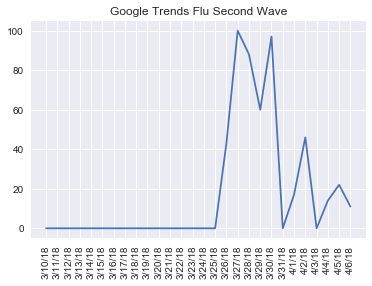

In [37]:
plt.plot(d['Date'][:28], d['google_second_wave_trend'][:28])
plt.title('Google Trends Flu Second Wave')
plt.xticks(d['Date'][:28], d['Date'][:28], rotation='vertical')
plt.show()

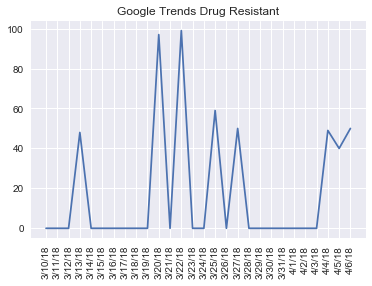

In [38]:
plt.plot(d['Date'][:28], d['google_drug_resistant_trend'][:28])
plt.title('Google Trends Drug Resistant')
plt.xticks(d['Date'][:28], d['Date'][:28], rotation='vertical')
plt.show()